# Build a computer vision model with tensorflow.
* Train a neural network to recognize articles of clothing
* Complete a series of exercises to guide me through experimenting iwth the different layers of the network

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

I will train a neural network to recognize items of clothing from a common dataset called [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist). It containst 70'000 items of clothing in 10 different categories. Each item of clothing is in a 28x28 grayscale image.

The labels associated with the dataset are:
<table>
    <tr>
        <th>Label</th>
        <th>Description</th>
    </tr>
    <tr>
      <td>0</td>
      <td>T-shirt / top</td>
    </tr>
    <tr>
      <td>1</td>
      <td>Trouser</td>
    </tr>
    <tr>
      <td>2</td>
      <td>Pullover</td>
    </tr>
    <tr>
      <td>3</td>
      <td>Dress</td>
    </tr>
    <tr>
      <td>4</td>
      <td>Coat</td>
    </tr>
    <tr>
      <td>5</td>
      <td>Sandal</td>
    </tr>
    <tr>
      <td>6</td>
      <td>Shirt</td>
    </tr>
    <tr>
      <td>7</td>
      <td>Sneaker</td>
    </tr>
    <tr>
      <td>8</td>
      <td>Bag</td>
    </tr>
    <tr>
      <td>9</td>
      <td>Ankle boot</td>
    </tr>
    
</table>

In [2]:
# The Fashion MNIST data is available in the `tf.keras.datasets` API
mnist = tf.keras.datasets.fashion_mnist

# Calling load_data on the object gives me two sets of two lists:
# training values and testing values, which represent graphics that show clothing intems and their labels
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

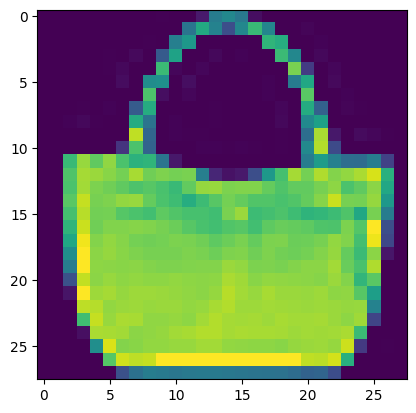

In [3]:
plt.imshow(training_images[100])

### Values are images from 0 to 255. And I want to normalize it.
the google course i'm following suggests to divide by 255.0 but I will normalize it through the standard deviation and the mean

In [16]:
# Code provided:
# training_images = training_images / 255.0
# test_images = test_images / 255.0

training_std = training_images.std()
training_mean = training_images.mean()

training_images = (training_images) / training_std
test_images = (test_images) / training_std

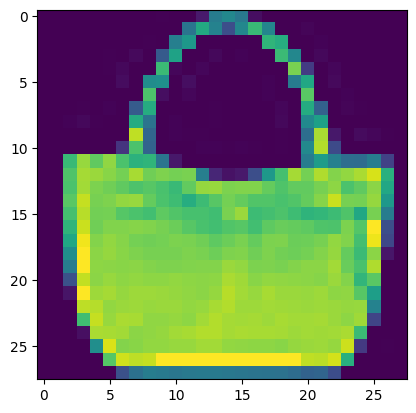

In [6]:
plt.imshow(training_images[100])

## Design the model
* `Sequential` defines a sequence of layers in the neural network.
* `Flatten` takes a square and turns it into a one-dimensional vector.
* `Dense` adds a layer of neurons.
* `Activation` functions tell each layer of neurons what to do. There are lots of options, but use these for now:
* `Relu` effectively means that if X is greater than 0 return X, else return 0. It only passes values of 0 or greater to the next layer in the network.
* `Softmax` takes a set of values, and effectively picks the biggest one. For example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], then it saves you from having to sort for the largest value—it returns [0,0,0,0,1,0,0,0,0].

In [33]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(), # As the data is a 28 x 28 array this layer makes it inot a 784 array
    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [34]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4625 - accuracy: 0.8322
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3535 - accuracy: 0.8705
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3178 - accuracy: 0.8812
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2968 - accuracy: 0.8891
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2789 - accuracy: 0.8957


In [36]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3728 - accuracy: 0.8685


[0.372791588306427, 0.8684999942779541]

## Observation
* We have 10 possible outcomes so the prediction is an array of ten probabilities that corresponds to the ten possible classifications
* Because of `Softmax` the sum of predictions is `1`.
* They are low probabilities except one.

In [21]:
classifications = model.predict(test_images)
classifications[0]

313/313 [==============================] - 0s 1ms/step


array([1.6142518e-07, 2.1990201e-07, 2.0835694e-07, 1.1600514e-09,
       2.0480374e-07, 1.9409969e-01, 1.1253834e-06, 2.3102682e-02,
       1.1453443e-07, 7.8279567e-01], dtype=float32)

In [28]:
tot_prob = 0
for i in range(0, 10):
    w = classifications[0][i]
    print(w, " ", i)
    tot_prob += w

print(tot_prob)

1.6142518e-07   0
2.19902e-07   1
2.0835694e-07   2
1.1600514e-09   3
2.0480374e-07   4
0.1940997   5
1.1253834e-06   6
0.023102682   7
1.1453443e-07   8
0.78279567   9
1.0000000797883268


In [39]:
# Callback example:
# loss might change so it seems interesting to stop training if certain conditions are respected: ex 95% accuracy

class myCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.91):
            print("\n Reached 91% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallBack()

model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1867/1875 [============================>.] - ETA: 0s - loss: 0.2045 - accuracy: 0.9232
 Reached 91% accuracy so cancelling training!
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2046 - accuracy: 0.9231
